<a href="https://colab.research.google.com/github/ilya-talankin/LSTM-power-forecasting/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def prepareData(datasetCsv, historySize):
    x = []
    y = []
    for oneCsv in datasetCsv:
        power = oneCsv.pop('power_normed')
        power = np.array(power)
        features = np.array(oneCsv)
        for i in range(historySize, len(features) - historySize):
            x.append(features[i - historySize : i])
            y.append(sum(power[i : i + 5]))
    return np.array(x), np.array(y)


In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
import tensorflow as tf
import os

from google.colab import drive
drive.mount('/content/drive')

# read data
os.chdir('/content/drive/MyDrive/Solar-Power-Forecasting/GermanSolarFarm/data/')
csv_files = [f for f in os.listdir('.') if f.endswith('.csv')]
dfs = []
for csv_file in csv_files:
    df = pd.read_csv(csv_file, delimiter=';')
    df = df.drop('Unnamed: 51', axis=1)
    dfs.append(df)

#data = data.drop('Unnamed: 51', axis=1)
historyInterval = 10

Mounted at /content/drive


In [ ]:
from sklearn.model_selection import train_test_split
historyInterval = 10
x, y = prepareData(dfs.copy(), historyInterval)
test_idx = int(0.8 * x.shape[0])

X_test = x[test_idx:]
y_test = y[test_idx:]

X_train, X_val, y_train, y_val = train_test_split(x[:test_idx], y[:test_idx], test_size=0.1, shuffle=False)

In [ ]:
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(historyInterval, 50), return_sequences=True))
model.add(LSTM(64, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 128)           91648     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 141121 (551.25 KB)
Trainable params: 141121 (551.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
2838/2838 [==============================] - 128s 42ms/step - loss: 658.9068 - mae: 2.9991 - val_loss: 0.3640 - val_mae: 0.4559
Epoch 2/50
2838/2838 [==============================] - 121s 43ms/step - loss: 0.3886 - mae: 0.4713 - val_loss: 0.2791 - val_mae: 0.4003
Epoch 3/50
2838/2838 [==============================] - 117s 41ms/step - loss: 0.3374 - mae: 0.4439 - val_loss: 0.3114 - val_mae: 0.4700
Epoch 4/50
2838/2838 [==============================] - 117s 41ms/step - loss: 0.4244 - mae: 0.4878 - val_loss: 0.2043 - val_mae: 0.3785
Epoch 5/50
2838/2838 [==============================] - 124s 44ms/step - loss: 0.4850 - mae: 0.5050 - val_loss: 0.2413 - val_mae: 0.3730
Epoch 6/50
2838/2838 [==============================] - 119s 42ms/step - loss: 0.6227 - mae: 0.5517 - val_loss: 0.9141 - val_mae: 0.8311
Epoch 7/50
2838/2838 [==============================] - 118s 41ms/step - loss: 0.6783 - mae: 0.4642 - val_loss: 0.2356 - val_mae: 0.3908
Epoch 8/50
2838/2838 [=================

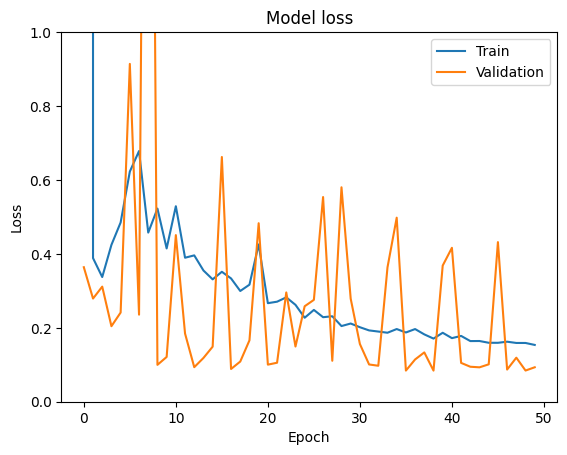

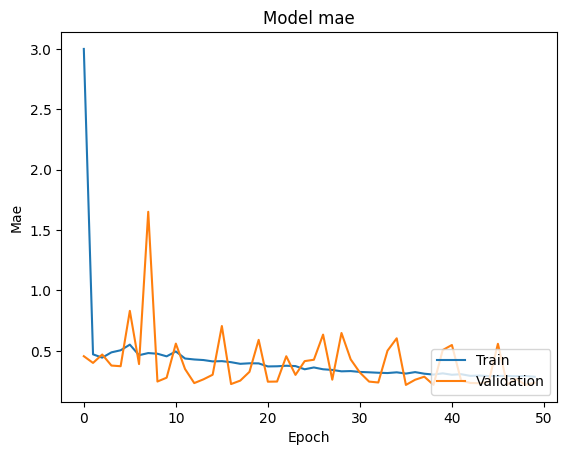

In [ ]:
import matplotlib.pyplot as plt

# Get the training history
history = model.history.history

# Plot the training and validation loss over time
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim(0,1)
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot the training and validation accuracy over time
plt.plot(history['mae'])
plt.plot(history['val_mae'])
plt.title('Model mae')
plt.ylabel('Mae')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [ ]:
history

{'loss': [658.9067993164062,
  0.38859862089157104,
  0.3373698890209198,
  0.42436161637306213,
  0.4850040376186371,
  0.6227250099182129,
  0.6782813668251038,
  0.45759469270706177,
  0.52257239818573,
  0.41470980644226074,
  0.5289533138275146,
  0.389619380235672,
  0.39594191312789917,
  0.355075478553772,
  0.33109381794929504,
  0.35156750679016113,
  0.3335437476634979,
  0.29960891604423523,
  0.31666991114616394,
  0.42570579051971436,
  0.26663437485694885,
  0.27064409852027893,
  0.2823939919471741,
  0.2621399164199829,
  0.22723659873008728,
  0.24838173389434814,
  0.22868990898132324,
  0.2312241494655609,
  0.2047160416841507,
  0.2115788608789444,
  0.20157676935195923,
  0.19294609129428864,
  0.18985143303871155,
  0.18665972352027893,
  0.19662870466709137,
  0.18736492097377777,
  0.19659025967121124,
  0.18219643831253052,
  0.17082169651985168,
  0.18654732406139374,
  0.1720314919948578,
  0.1780274510383606,
  0.16409878432750702,
  0.1642548143863678,
  0